# Exercices

With each exercice will teach you one aspect of deep learning.
The process of machine learning can be decompose in 7 steps :

0. Data acquisition
1. Data preparation
2. Model definition
3. Model training
4. Model evaluation
5. Hyperparameter tuning
6. Prediction

In [19]:
from __future__ import print_function
import torch

## 2 - Model definition

from https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html


### Tensors

#### Initialization of tensors

Tensors are just super matrix, and it's easy to play with these in pytorch (some say easier than ndarray in pandas...).

In [20]:
x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00, -1.5846e+29, -1.5244e+07],
        [-1.0845e-19,  5.5481e-20,  1.4013e-45],
        [ 1.0031e-28,  4.0178e-41,  1.0031e-28],
        [ 4.0178e-41,  8.3451e-10,  1.6899e-04],
        [-4.2569e-06,  4.5845e-41, -1.5236e+07]])


In [21]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7582, 0.4262, 0.6134],
        [0.0238, 0.1727, 0.9239],
        [0.7537, 0.7834, 0.0335],
        [0.7128, 0.3169, 0.2428],
        [0.4421, 0.7118, 0.6120]])


In [22]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [23]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [24]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.0097,  1.4601,  0.5915],
        [-0.1474,  1.7640, -1.4440],
        [-0.2559,  1.0191,  0.3020],
        [ 1.4006, -2.3740, -1.3858],
        [-0.5092,  0.3114, -1.2601]])


In [25]:
print(x.size())

torch.Size([5, 3])


#### Tensors operations

Generate tensors and apply operations to get things done.

In [26]:
y = torch.randn_like(x, dtype=torch.float) 
print(torch.add(x, y))

tensor([[-0.2923,  2.0582,  2.3664],
        [-2.0153,  2.2022, -0.4129],
        [-1.3965,  1.8661,  1.2686],
        [ 1.5011, -0.7045, -2.4005],
        [ 0.3618, -0.8300, -1.6199]])


In [27]:
result = torch.empty(5, 3)
torch.sub(x, y, out=result)
print(result)

tensor([[ 0.2729,  0.8620, -1.1833],
        [ 1.7205,  1.3259, -2.4751],
        [ 0.8846,  0.1721, -0.6645],
        [ 1.3001, -4.0434, -0.3712],
        [-1.3802,  1.4527, -0.9003]])


In [28]:
print(x[:, 1])

tensor([ 1.4601,  1.7640,  1.0191, -2.3740,  0.3114])


In [29]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [30]:
x = torch.randn(1)
print(x)
print(x.item()) # get value as number

tensor([0.9942])
0.9942139387130737


#### Tensors bridge to numpy

In [31]:
a = torch.ones(5)
print(a)
b = a.numpy() # numpy view to a (reference)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [32]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [33]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) # data copied (value transfer)
np.add(a, 1, out=a)
print(a)
print(b)
a = a + 1
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### Load in GPU

This one need a GPU of course.

In [34]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!
    

### Autograd of tensors

Core to DNN: propagation of gradient to train the weights.
Core to gradient: computing the gradient.
Well, pytorch just got autograd which is as cool as it sounds.

In [35]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [36]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


Gradient information is everywhere...

In [37]:
print(y.grad_fn)

In [38]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [39]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### Compute gradient

Easy...

In [40]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Don't do it twice!

In [41]:
out.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [42]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 1366.9066, -1143.9188,    -6.4782], grad_fn=<MulBackward0>)


In [43]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [44]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# Building neural network from scratch

### LeNet architecture
http://yann.lecun.com/exdb/lenet/

In [45]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


leNet = Net()
print(leNet)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [46]:
params = list(leNet.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [47]:
print(params)

[Parameter containing:
tensor([[[[-0.0896,  0.1447,  0.0419, -0.0402, -0.1495],
          [-0.1326,  0.1096, -0.0191, -0.1165, -0.0272],
          [-0.0674, -0.0582,  0.0528, -0.0213, -0.1811],
          [-0.0393, -0.0355, -0.0069,  0.0284, -0.1924],
          [-0.0632,  0.0014, -0.0214,  0.0847,  0.1070]]],


        [[[ 0.0615,  0.1394,  0.1102,  0.1709, -0.0525],
          [ 0.1266, -0.0722, -0.1876,  0.1302, -0.1064],
          [ 0.0700,  0.1996,  0.1887,  0.0772, -0.0034],
          [-0.0962,  0.1499,  0.1804,  0.1565,  0.0830],
          [-0.0007,  0.1336, -0.1253,  0.1186, -0.0370]]],


        [[[-0.0220,  0.0131, -0.0113, -0.1854,  0.1309],
          [ 0.1776,  0.0584, -0.0189,  0.1582, -0.0103],
          [ 0.0184, -0.1426, -0.0666,  0.1983,  0.1384],
          [ 0.1768, -0.0827, -0.1564,  0.1112,  0.0363],
          [-0.0337,  0.0953,  0.1696,  0.0392, -0.0180]]],


        [[[ 0.1465, -0.1221,  0.0468,  0.0867,  0.1265],
          [-0.1444, -0.1266,  0.1207,  0.1348, -0.091

In [48]:
input = torch.randn(1, 1, 32, 32)
out = leNet(input)
print(out)

tensor([[ 0.0497,  0.1080, -0.0544,  0.1040,  0.0961, -0.0908,  0.1231, -0.0039,
         -0.0105,  0.0756]], grad_fn=<AddmmBackward>)


### Save and load the model

In [49]:
torch.save(leNet.state_dict(), './leNet.h5')

In [50]:
anotherNet = Net()
anotherNet.load_state_dict(torch.load('./leNet.h5'))
anotherNet.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Loss Function

In [51]:
input = torch.randn(1, 1, 32, 32) # random input
output = leNet(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output

criterion = nn.MSELoss()
#criterion = nn.CrossEntropyLoss()

loss = criterion(output, target)
print(loss)

tensor(1.0696, grad_fn=<MseLossBackward>)


In [52]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop

In [53]:
leNet.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(leNet.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(leNet.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0013, -0.0150, -0.0164,  0.0053, -0.0117, -0.0126])


In [54]:
import torch.optim as optim

# create your optimizer
# optimizer = optim.SGD(leNet.parameters(), lr=0.01)
optimizer = optim.Adam(leNet.parameters(), lr=2e-3)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = leNet(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

### Saving/loading during training

In [55]:
import time
import datetime
stamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%dT%H.%M.%S')
torch.save({
            'epoch': 1,
            'model_state_dict': leNet.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, 'checkpoint-{}.last'.format(stamp))

In [56]:
model = Net()
optimizer = optim.SGD(leNet.parameters(), lr=0.01)

checkpoint = torch.load('checkpoint-{}.last'.format(stamp))
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

## Loading data

### Preparing dataset

Remember lesson 1?

#### Loading MNIST data

In [57]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

data_path = './data'

#trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
trans = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

# if not exist, download mnist dataset
train_set = dset.MNIST(root=data_path, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=data_path, train=False, transform=trans, download=True)

In [58]:
print(len(train_set))
print(len(test_set))

60000
10000


<class 'torch.Tensor'> torch.Size([1, 32, 32])
8
<class 'torch.Tensor'> torch.Size([32, 1, 32])


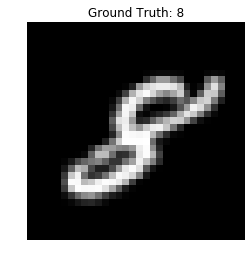

In [60]:
import matplotlib.pyplot as plt
import random

fig = plt.figure()

sample = train_set[random.randint(1,len(train_set))]
print(type(sample[0]), sample[0].shape)
print(sample[1].item())

tensor_image = sample[0].view(sample[0].shape[2], sample[0].shape[0], sample[0].shape[1])
print(type(tensor_image), tensor_image.shape)

tensor_image = torch.squeeze(tensor_image)

plt.imshow(tensor_image, cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(sample[1].item()))

plt.axis('off')
plt.ioff()
plt.show()